## Q-LEARNING 

### FrozenLake-v1
"The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile."
https://gym.openai.com/envs/FrozenLake-v0/ 

The below is Frozen Lake set to not be slippery. 

In [11]:
import sys

In [12]:
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install gym

In [13]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
from gym.envs.toy_text.frozen_lake import generate_random_map

import matplotlib.pyplot as plt
import gc
gc.disable() #Disable automatic garbage collection.

In [14]:
env = gym.make('FrozenLake-v1', is_slippery=False)
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [15]:
num_episodes = 20000
max_steps_per_episode = 100

learning_rate = 0.2 #0.03 #Between 0 and 1. How quickly the agent abandons the previous value in the Q table for the new value. 0: Agent learns nothing and only uses prior knowledge. 1: Agent considers only the most recent information.
discount_rate = 0.98 #0.97

exploration_rate = 1
max_exploration_rate = 1    #1: Guaranteed that agent starts the game by 100% exploring the environment
min_exploration_rate = 0    #0: Agent does not explore at all. Agent only exploits (chooses actions to get max points)
exploration_decay_rate = 0.001

*** AVG reward per 1000 episodes***

1000 :  0.2630000000000002
2000 :  0.7580000000000006
3000 :  0.9120000000000007
4000 :  0.9700000000000008
5000 :  0.9900000000000008
6000 :  0.9970000000000008
7000 :  0.9990000000000008
8000 :  0.9990000000000008
9000 :  0.9990000000000008
10000 :  1.0000000000000007
11000 :  1.0000000000000007
12000 :  1.0000000000000007
13000 :  1.0000000000000007
14000 :  1.0000000000000007
15000 :  1.0000000000000007
16000 :  1.0000000000000007
17000 :  1.0000000000000007
18000 :  1.0000000000000007
19000 :  1.0000000000000007
20000 :  1.0000000000000007


 *** Q-table ***

[[0.88584238 0.9039208  0.86812553 0.88584238]
 [0.88584238 0.         0.83886856 0.86715442]
 [0.8657317  0.4942096  0.47132345 0.39648929]
 [0.72293948 0.         0.11899669 0.1076066 ]
 [0.9039208  0.92236816 0.         0.88584238]
 [0.         0.         0.         0.        ]
 [0.         0.94307819 0.         0.22347536]
 [0.         0.         0.         0.        ]
 [0.92236816 0. 

(0.0, 1.0)

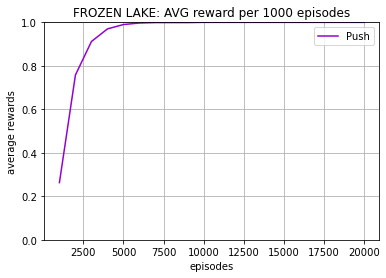

In [16]:
rewards_all_episodes = []

# Q-Learning algorithm
for episode in range(num_episodes):
    
    # random_map = generate_random_map(size=4, p=0.8)
    # env = gym.make("FrozenLake-v0", desc=random_map)
    env = gym.make('FrozenLake-v1', is_slippery=False)
    state = env.reset()

    done = False
    rewards_current_episode = 0

    for step in range (max_steps_per_episode):

        # Exploration / Exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_episode += reward

        if done == True:
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

    rewards_all_episodes.append(rewards_current_episode)

# Calculate reward across all episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes / 1000)
count = 1000
count_plot = [] #for plotting
r_plot = [] #for plotting
print("*** AVG reward per 1000 episodes***\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count_plot.append(count) #for plotting. 
    r_plot.append(sum(r/1000)) #for plotting
    count += 1000


# Print Q table
print("\n\n *** Q-table ***\n")
print(q_table)


#Plot results 
%matplotlib inline
#Name x-axis, y-axis and whole graph
plt.xlabel("episodes")
plt.ylabel("average rewards")
plt.title("FROZEN LAKE: AVG reward per 1000 episodes")
# Plotting all the graphs
plt.plot(count_plot, r_plot, color="darkviolet", label = "Push")
plt.grid()
plt.legend()
#Load the display window
plt.show
#set y-axis limit
plt.ylim([0, 1])

In [17]:
# random_map = generate_random_map(size=4, p=0.8)
# env = gym.make("FrozenLake-v0", desc=random_map)
env = gym.make('FrozenLake-v1', is_slippery=False)
for episode in range(10): #number of episodes played through - up to 20,000
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(0.5) #changed from 1

    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.1) #changed from 0.3
        
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(0.5) #changed from 3
            else:
                print("****You fell through a hole!****")
                time.sleep(0.5) #changed from 3
            clear_output(wait=True)
            break
            
        state = new_state
        
env.close()

  (Right)
SFFF
FHFH
FFFH
HFFG
****You reached the goal!****
